# Importation des données, bibliothèques et choix des données justes

In [97]:
# Import des librairies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [98]:
file_path = 'meteo.csv'
dataset = pd.read_csv(file_path)
dataset.shape

(1244, 47)

In [ ]:
# Visualiser les 10 premières lignes du dataset
dataset.head(10)

In [100]:
# Bilan des variables à supprimer
to_remove = [
    'Hour', 'Year', 'Unnamed: 0',
    'Minute', 'Day'
    ]

In [101]:
columns_to_exclude = to_remove + ['pluie.demain']
x_dataset = dataset.drop(columns_to_exclude, axis=1)

In [ ]:
# Visualiser les 10 premières lignes du nouveau dataset
x_dataset.head(10)

# Application du PCA

In [103]:
from sklearn.preprocessing import scale
# Normaliser les données
dataset_ = scale(x_dataset)

In [104]:
pca = PCA(n_components = 5)
pca.fit(dataset_)

PCA(n_components=5)

Nous affichons ci-dessous les ratios de variance expliquée pour chaque composante principale obtenue. Nous renvoiyons donc un tableau contenant les pourcentages de variance expliquée par chaque composante principale

In [105]:
print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

[0.31747944 0.13350227 0.10628492 0.05962418 0.0493805 ]


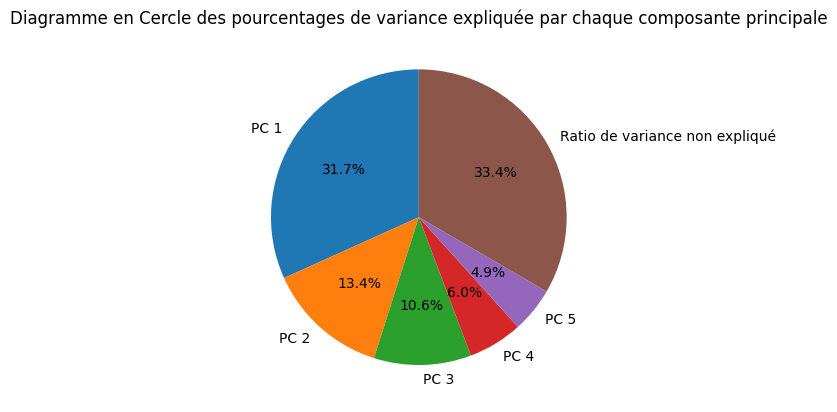

In [106]:
ratios = [0.31747944, 0.13350227, 0.10628492, 0.05962417, 0.04938007]
total = sum(ratios)
#print(total)
non_explique = 1 - total
ratios_ = ratios + [non_explique]

labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'Ratio de variance non expliqué']

plt.pie(ratios_, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Diagramme en Cercle des pourcentages de variance expliquée par chaque composante principale')
plt.show()

On remarque que les 5 Composantes principales permettent d'expliquer 66.6% (soit 2/3) de la variance entre les données. Et donc que 33.4% du reste de ladite variance est contenue dans le reste dans composantes.

In [107]:
print(pca.singular_values_)

[127.25062467  82.51757147  73.62714068  55.14591238  50.18568562]


Nous affichons ci-dessus les valeurs singulières qui sont des mesures de la variabilité de chaque composante principale. Plus précisément, les valeurs singulières sont les racines carrées des valeurs propres de la matrice de covariance des données

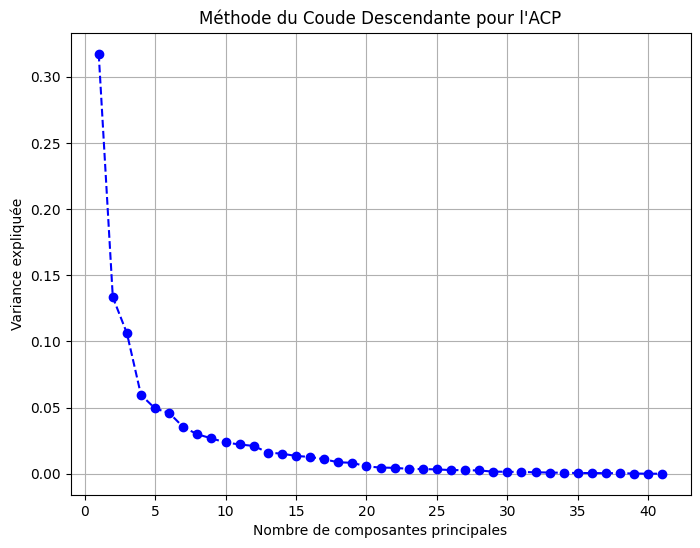

In [108]:
# Calculer l'ACP pour différentes valeurs de composantes
n_components = min(dataset_.shape)
explained_variance = []

for i in range(1, n_components + 1):
    pca = PCA(n_components=i)
    pca.fit(dataset_)
    explained_variance.append(pca.explained_variance_ratio_[-1])

# Tracer le graphique de la méthode du coude descendante
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Méthode du Coude Descendante pour l\'ACP')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()


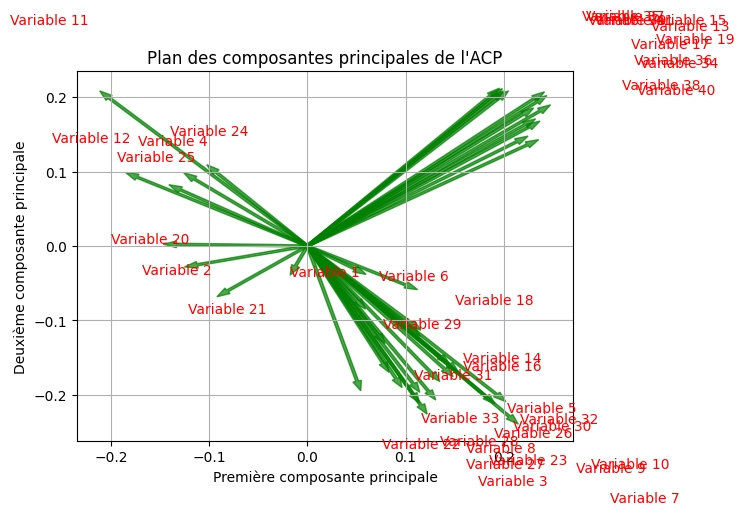

In [109]:
# Tracer les variables initiales sur le plan des composantes principales
feature_vectors = pca.components_.T  # Transposer pour obtenir les vecteurs de caractéristiques
for i, v in enumerate(feature_vectors):
    plt.arrow(0, 0, v[0], v[1], color='g', alpha=0.7, width=0.003)
    plt.text(v[0]*1.5, v[1]*1.5, f'Variable {i+1}', color='r')

# Ajouter des labels et un titre
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Plan des composantes principales de l\'ACP')

# Afficher le graphique
plt.grid(True)
plt.show()

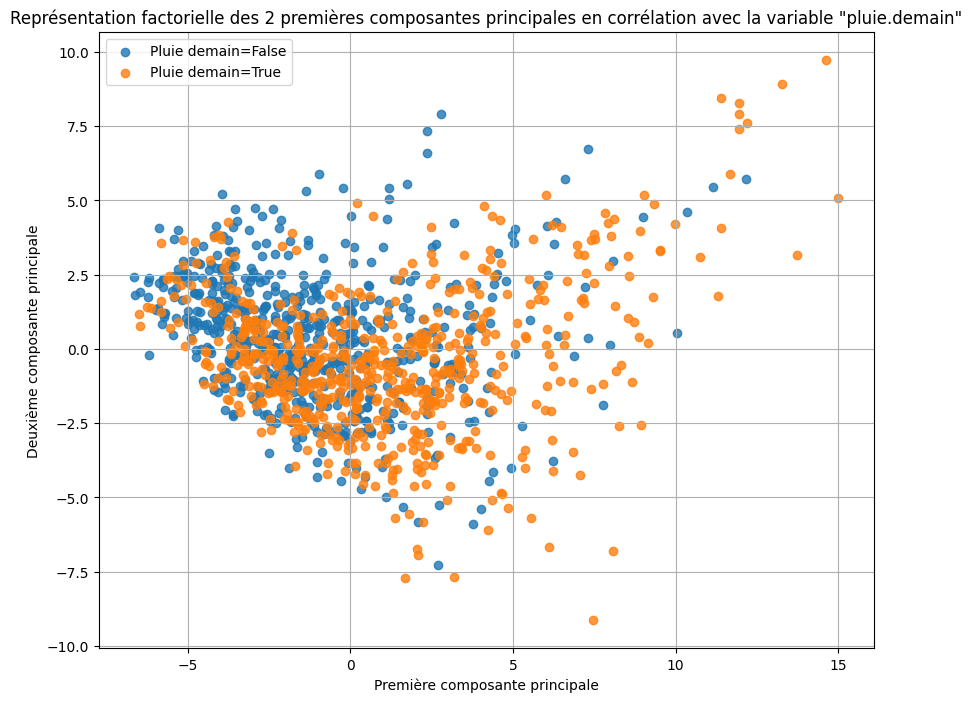

In [110]:
# Créer un nuage de points en corrélation avec la variable "pluie.demain"

rain_tomorrow = dataset['pluie.demain']

components = pca.fit_transform(dataset_)

plt.figure(figsize=(10, 8))

# Diviser les points en fonction de la variable "pluie.demain"
for label in np.unique(rain_tomorrow):
    indices = np.where(rain_tomorrow == label)
    plt.scatter(components[indices, 0], components[indices, 1], label=f'Pluie demain={label}', alpha=0.8)

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Représentation factorielle des 2 premières composantes principales en corrélation avec la variable "pluie.demain"')
plt.legend()
plt.grid(True)
plt.show()


Ce dernier graphique est la représentation factorielle des 2 premières composantes principales en corrélation avec la variable "pluie.demain". Il permet de visualiser comment les composantes principales sont liées à la variable cible.